In [124]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import matplotlib.pyplot as plt

import seaborn as sns

In [125]:
df = pd.read_csv('/content/data_task1.csv')

In [126]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [128]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(str)

In [129]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [130]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [131]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [132]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

print(numerical_columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')


In [133]:
data = df.copy()

In [134]:
scaler = MinMaxScaler()

data[numerical_columns]= scaler.fit_transform(data[numerical_columns])

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,Low Fat,0.048866,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.283587
1,DRC01,0.081274,Regular,0.058705,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.031419
2,FDN15,0.770765,Low Fat,0.051037,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.158115
3,FDX07,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,1998,Medium,Tier 3,Grocery Store,0.053555
4,NCD19,0.260494,Low Fat,0.000000,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,0.073651


# Label Encoding

Encoding Item_Fat_Content column:

In [135]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [136]:
data['Item_Fat_Content'].replace('low fat','Low Fat', inplace=True)
data['Item_Fat_Content'].replace('LF','Low Fat', inplace=True)
data['Item_Fat_Content'].replace('reg','Regular', inplace=True)

In [137]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [138]:
label_encoder = LabelEncoder()

data['Item_Fat_Content']= label_encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Fat_Content'].unique()

array([0, 1])

In [139]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,0,0.048866,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.283587
1,DRC01,0.081274,1,0.058705,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.031419
2,FDN15,0.770765,0,0.051037,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.158115
3,FDX07,0.871986,1,0.000000,Fruits and Vegetables,0.640093,OUT010,1998,Medium,Tier 3,Grocery Store,0.053555
4,NCD19,0.260494,0,0.000000,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,0.073651


Encoding Item_Type column:

In [140]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [141]:
data['Item_Type']= label_encoder.fit_transform(data['Item_Type'])

data['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [142]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,0,0.048866,4,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.283587
1,DRC01,0.081274,1,0.058705,14,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.031419
2,FDN15,0.770765,0,0.051037,10,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.158115
3,FDX07,0.871986,1,0.000000,6,0.640093,OUT010,1998,Medium,Tier 3,Grocery Store,0.053555
4,NCD19,0.260494,0,0.000000,9,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,0.073651


Encoding Outlet_Size column:

In [143]:
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [144]:
data['Outlet_Size']= label_encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Size'].unique()

array([1, 0, 2])

In [145]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,0,0.048866,4,0.927507,OUT049,1999,1,Tier 1,Supermarket Type1,0.283587
1,DRC01,0.081274,1,0.058705,14,0.072068,OUT018,2009,1,Tier 3,Supermarket Type2,0.031419
2,FDN15,0.770765,0,0.051037,10,0.468288,OUT049,1999,1,Tier 1,Supermarket Type1,0.158115
3,FDX07,0.871986,1,0.000000,6,0.640093,OUT010,1998,1,Tier 3,Grocery Store,0.053555
4,NCD19,0.260494,0,0.000000,9,0.095805,OUT013,1987,0,Tier 3,Supermarket Type1,0.073651


Encoding Outlet_Location_Type column:

In [146]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [147]:
data['Outlet_Location_Type'] = label_encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [148]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,0,0.048866,4,0.927507,OUT049,1999,1,0,Supermarket Type1,0.283587
1,DRC01,0.081274,1,0.058705,14,0.072068,OUT018,2009,1,2,Supermarket Type2,0.031419
2,FDN15,0.770765,0,0.051037,10,0.468288,OUT049,1999,1,0,Supermarket Type1,0.158115
3,FDX07,0.871986,1,0.000000,6,0.640093,OUT010,1998,1,2,Grocery Store,0.053555
4,NCD19,0.260494,0,0.000000,9,0.095805,OUT013,1987,0,2,Supermarket Type1,0.073651


Encoding Outlet_Type column:

In [149]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [150]:
data['Outlet_Type'] = label_encoder.fit_transform(data['Outlet_Type'])

data['Outlet_Type'].unique()

array([1, 2, 0, 3])

Encoding Outlet_Identifier column:

In [151]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [152]:
data['Outlet_Identifier'] = label_encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Identifier'].unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [153]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,0,0.048866,4,0.927507,9,1999,1,0,1,0.283587
1,DRC01,0.081274,1,0.058705,14,0.072068,3,2009,1,2,2,0.031419
2,FDN15,0.770765,0,0.051037,10,0.468288,9,1999,1,0,1,0.158115
3,FDX07,0.871986,1,0.000000,6,0.640093,0,1998,1,2,0,0.053555
4,NCD19,0.260494,0,0.000000,9,0.095805,1,1987,0,2,1,0.073651


# Correlation

<ipython-input-154-e25ee7fb1fb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = data.corr()


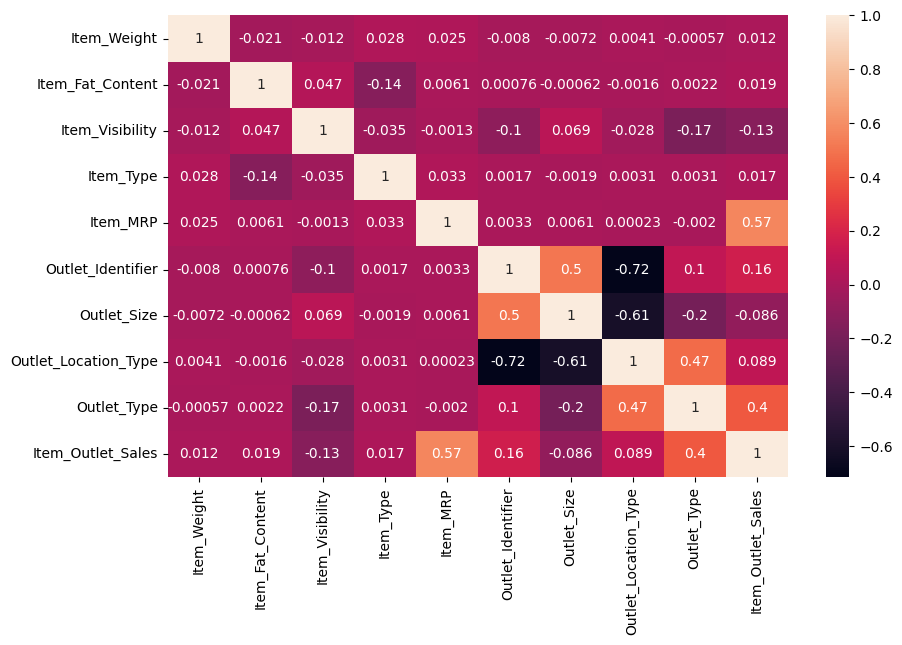

In [154]:
corrMatrix = data.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corrMatrix, annot=True)
plt.show()

In [155]:
data = data.drop(['Item_Identifier'],axis=1)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0,0.048866,4,0.927507,9,1999,1,0,1,0.283587
1,0.081274,1,0.058705,14,0.072068,3,2009,1,2,2,0.031419
2,0.770765,0,0.051037,10,0.468288,9,1999,1,0,1,0.158115
3,0.871986,1,0.000000,6,0.640093,0,1998,1,2,0,0.053555
4,0.260494,0,0.000000,9,0.095805,1,1987,0,2,1,0.073651


# Linear Regression

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [157]:
X= data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [159]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [160]:
y_pred = model.predict(X_test)

print(y_pred)

[ 0.15073161  0.13008819  0.11407316 ...  0.12319663  0.10392732
 -0.00649107]


In [161]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.008273332928284607


In [162]:
mae = mean_absolute_error(y_test, y_pred)
print (mae)

0.06846940670204567
